In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import time

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1024 non-null   float64
 3   trestbps  1025 non-null   int64  
 4   chol      1022 non-null   float64
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1023 non-null   float64
 8   exang     1025 non-null   int64  
 9   oldpeak   1023 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1024 non-null   float64
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(5), int64(9)
memory usage: 112.2 KB


In [5]:
def randomly_replace_values(df, replace_fraction=0.2):
 
    for col in df.columns:
        # Determine how many values to replace with NaN
        num_to_replace = int(replace_fraction * len(df))

        # Randomly select indices to replace in the current column
        indices = np.random.choice(df.index, num_to_replace, replace=False)
        
        # Set the selected indices to NaN
        df.loc[indices, col] = np.nan
    
    return df

# Apply the function
df_with_random_nans = randomly_replace_values(df, replace_fraction=0.3)
print(df_with_random_nans)

       age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0     52.0  1.0  0.0     125.0  212.0  0.0      1.0    168.0    0.0      1.0   
1     53.0  1.0  NaN       NaN  203.0  1.0      0.0    155.0    1.0      3.1   
2     70.0  1.0  0.0     145.0  174.0  0.0      1.0    125.0    1.0      2.6   
3     61.0  1.0  0.0     148.0  203.0  0.0      1.0    161.0    0.0      NaN   
4      NaN  0.0  0.0     138.0  294.0  NaN      1.0    106.0    NaN      1.9   
...    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
1020  59.0  NaN  1.0     140.0  221.0  0.0      1.0    164.0    NaN      0.0   
1021  60.0  1.0  0.0       NaN  258.0  0.0      NaN    141.0    1.0      NaN   
1022   NaN  NaN  NaN     110.0  275.0  NaN      NaN    118.0    1.0      1.0   
1023  50.0  NaN  NaN       NaN  254.0  0.0      0.0    159.0    0.0      0.0   
1024  54.0  1.0  NaN       NaN  188.0  0.0      NaN    113.0    NaN      NaN   

      slope   ca  thal  target  
0     

In [6]:
df=df.fillna('')

In [7]:
print(df)

       age  sex   cp trestbps   chol  fbs restecg thalach exang oldpeak slope  \
0     52.0  1.0  0.0    125.0  212.0  0.0     1.0   168.0   0.0     1.0         
1     53.0  1.0                203.0  1.0     0.0   155.0   1.0     3.1   0.0   
2     70.0  1.0  0.0    145.0  174.0  0.0     1.0   125.0   1.0     2.6   0.0   
3     61.0  1.0  0.0    148.0  203.0  0.0     1.0   161.0   0.0           2.0   
4           0.0  0.0    138.0  294.0          1.0   106.0           1.9   1.0   
...    ...  ...  ...      ...    ...  ...     ...     ...   ...     ...   ...   
1020  59.0       1.0    140.0  221.0  0.0     1.0   164.0           0.0   2.0   
1021  60.0  1.0  0.0           258.0  0.0           141.0   1.0           1.0   
1022                    110.0  275.0                118.0   1.0     1.0         
1023  50.0                     254.0  0.0     0.0   159.0   0.0     0.0   2.0   
1024  54.0  1.0                188.0  0.0           113.0                 1.0   

       ca thal target  
0  

In [8]:
# Get minimum values for numeric columns only
min_val = df.min(numeric_only=True)
print("Minimum values for numeric columns:\n", min_val)

# Convert non-numeric columns to NaN
df = df.apply(pd.to_numeric, errors='coerce')

# Now calculate the minimum values
min_val = df.min()
print("Minimum values for each column:\n", min_val)

# Calculate the minimum values for each column
min_values = df.min()

# Fill NaN values in each column with its minimum value
df_filled_with_min = df.fillna(min_values)

# Display the new DataFrame
print("Original DataFrame:\n", df)
print("New DataFrame with NaN filled by column minimum: ", df_filled_with_min)
df_filled_with_min.to_csv('new_data1.csv',index=False)

Minimum values for numeric columns:
 Series([], dtype: float64)
Minimum values for each column:
 age          29.0
sex           0.0
cp            0.0
trestbps     94.0
chol        126.0
fbs           0.0
restecg       0.0
thalach      88.0
exang         0.0
oldpeak       0.0
slope         0.0
ca            0.0
thal          0.0
target        0.0
dtype: float64
Original DataFrame:
        age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0     52.0  1.0  0.0     125.0  212.0  0.0      1.0    168.0    0.0      1.0   
1     53.0  1.0  NaN       NaN  203.0  1.0      0.0    155.0    1.0      3.1   
2     70.0  1.0  0.0     145.0  174.0  0.0      1.0    125.0    1.0      2.6   
3     61.0  1.0  0.0     148.0  203.0  0.0      1.0    161.0    0.0      NaN   
4      NaN  0.0  0.0     138.0  294.0  NaN      1.0    106.0    NaN      1.9   
...    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
1020  59.0  NaN  1.0     140.0  221.0  0.0      1.0    

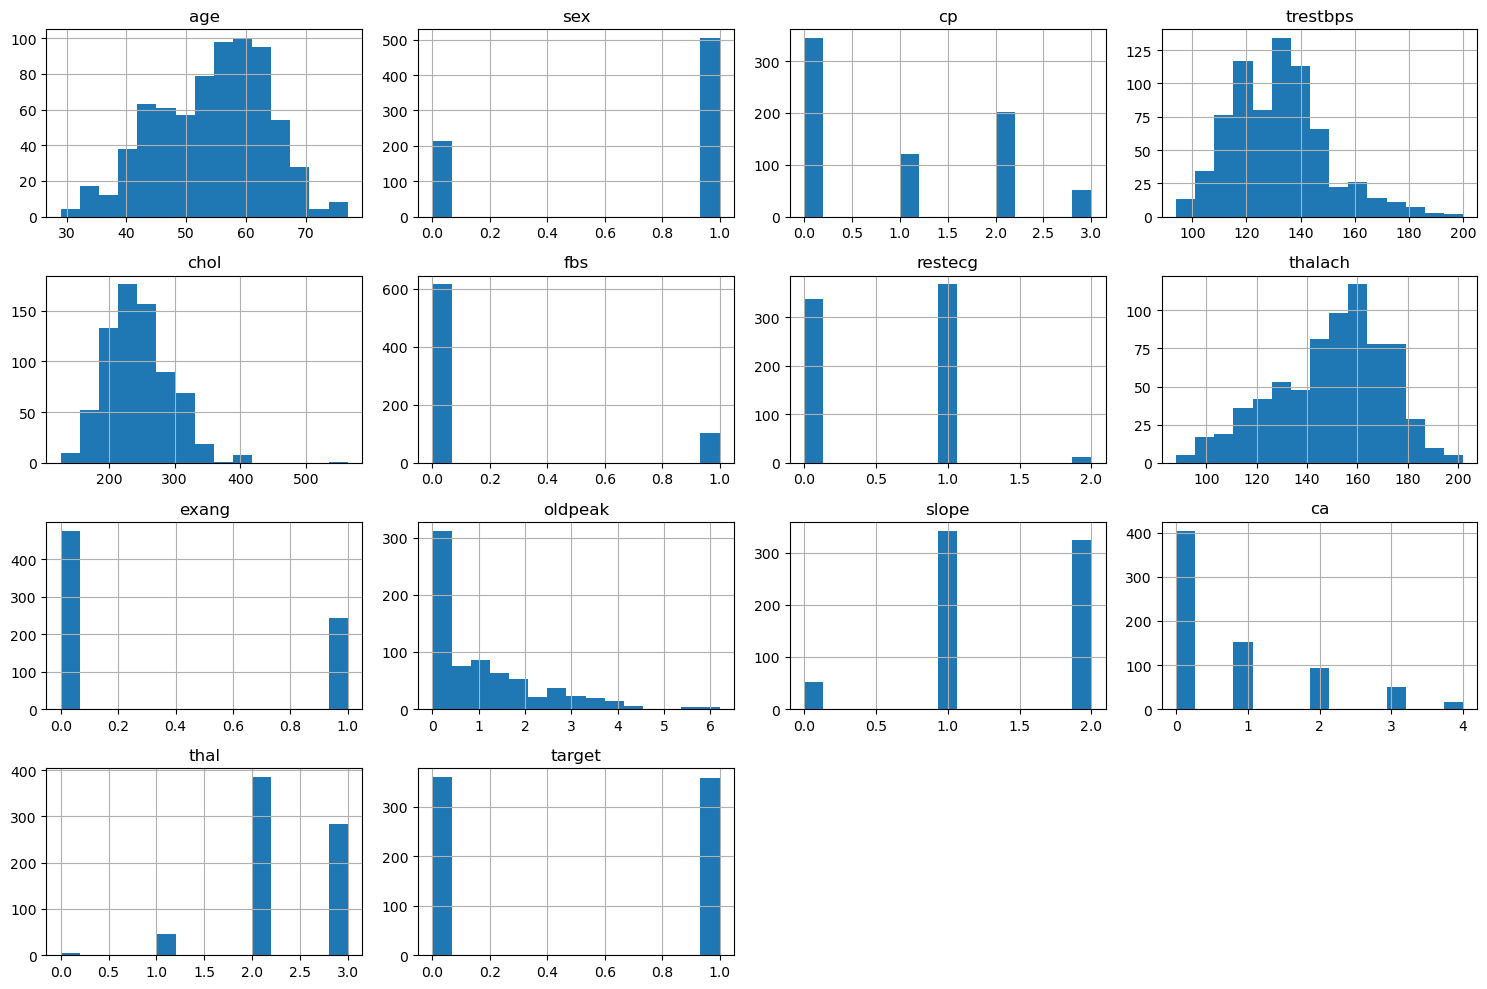

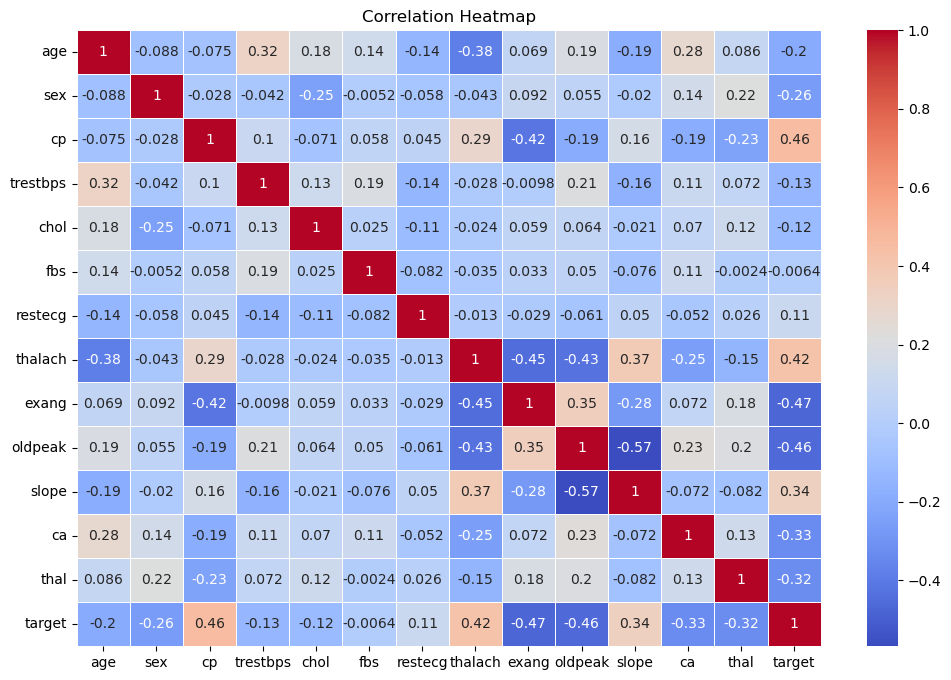

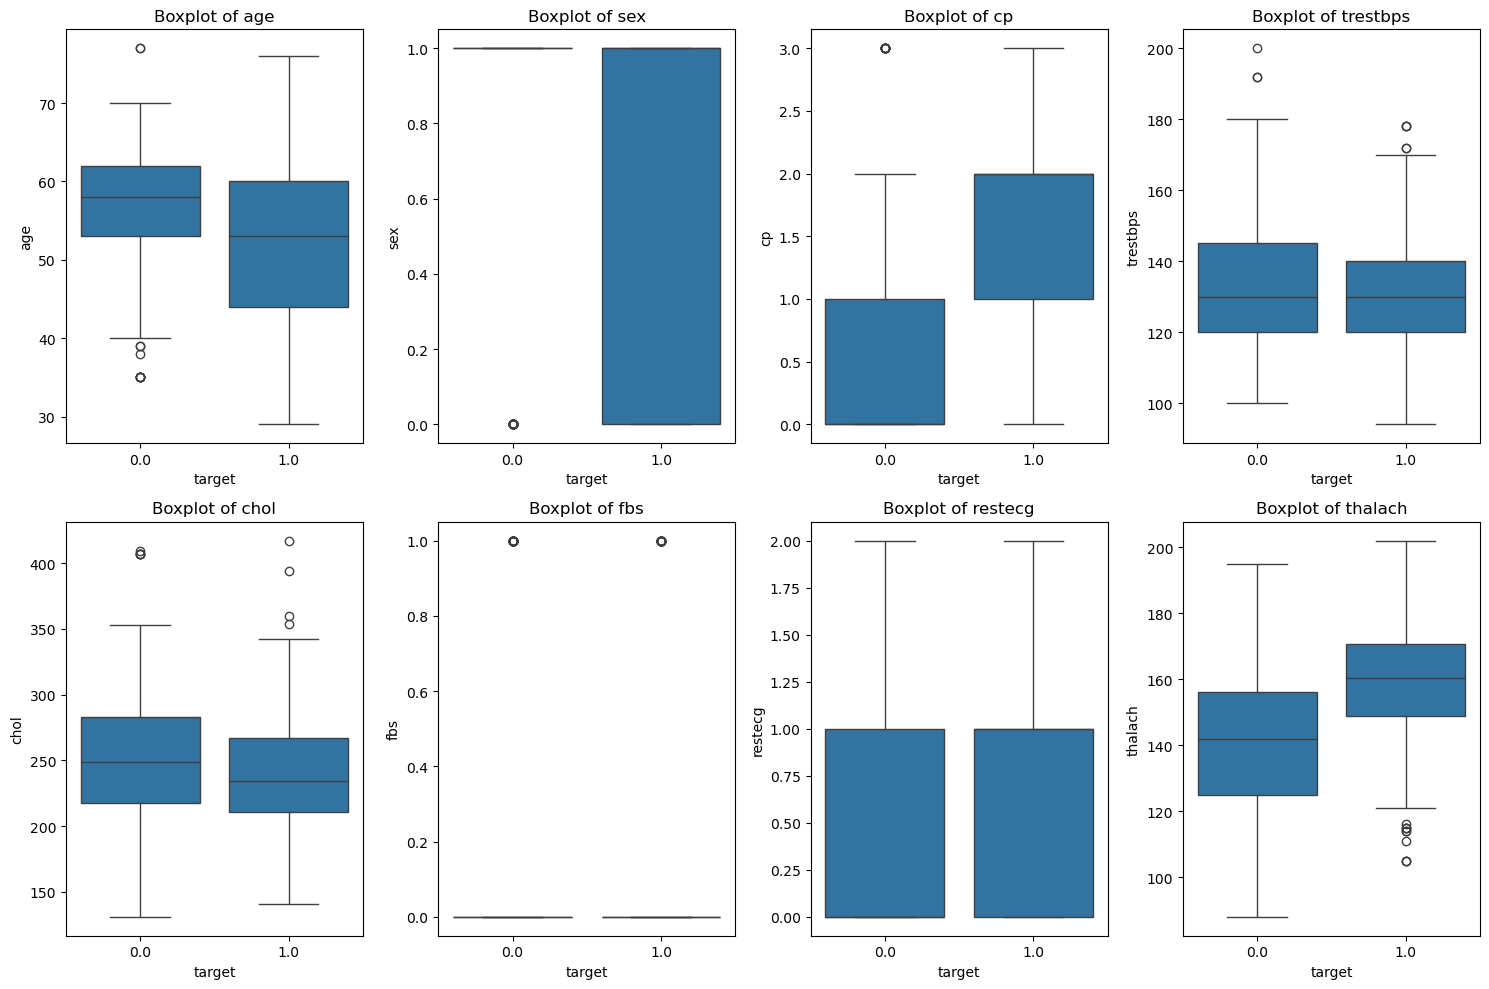

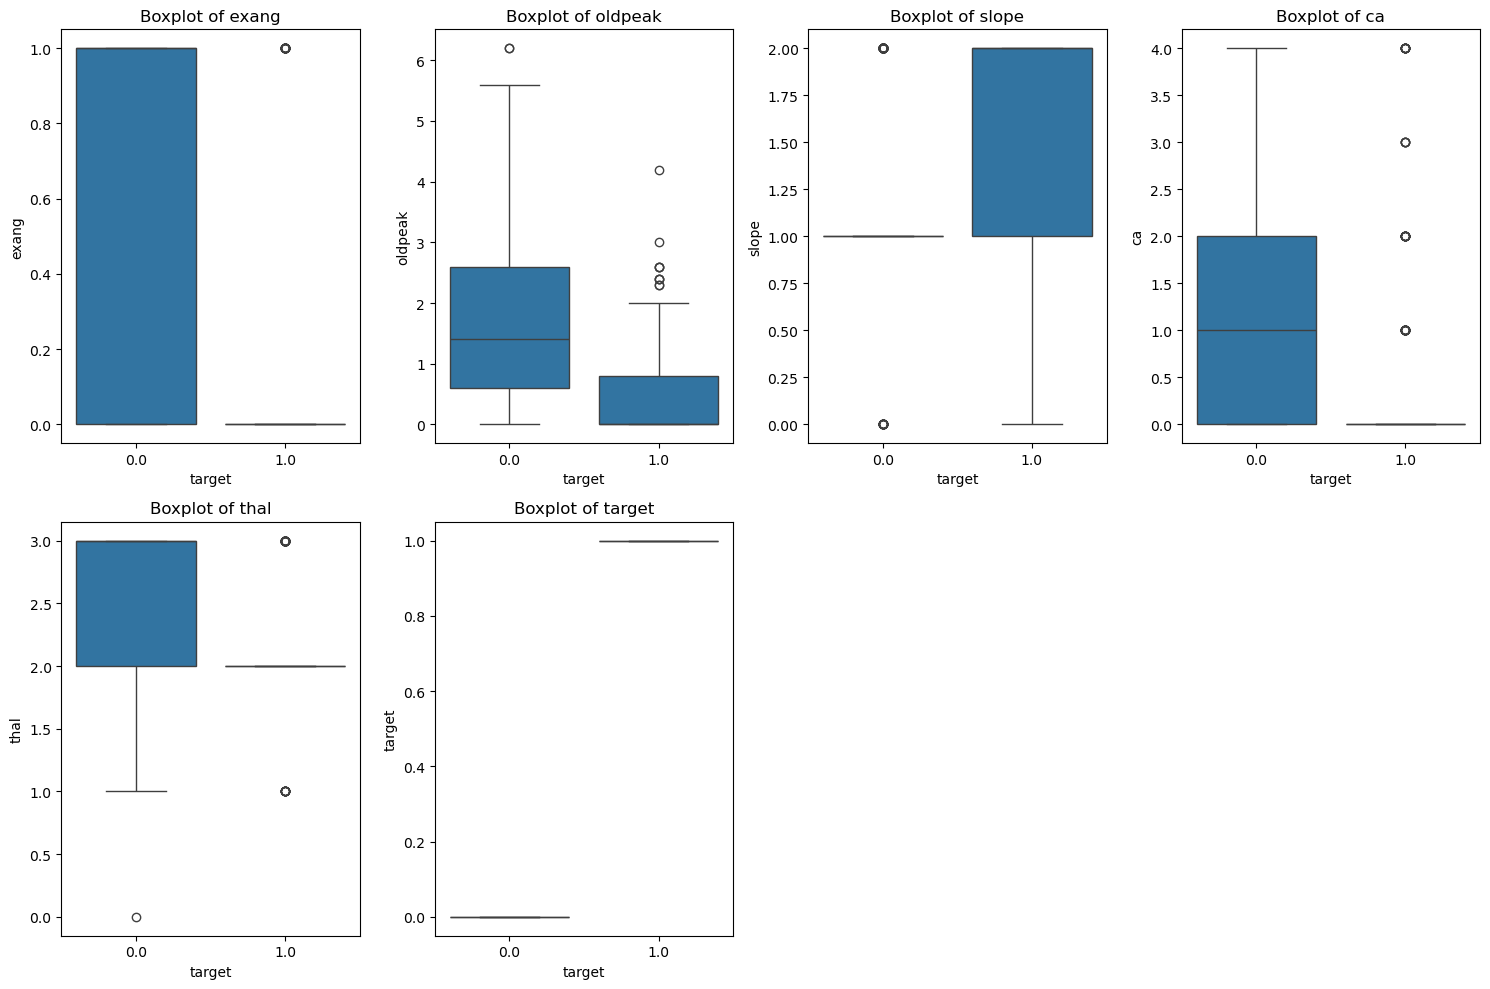

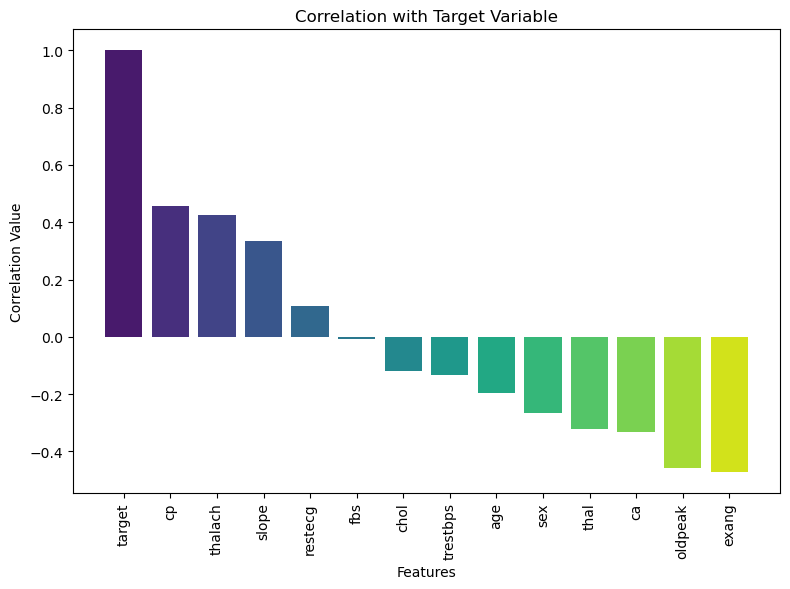

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histograms for Numeric Features
def plot_histograms(df):
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    df[numeric_columns].hist(bins=15, figsize=(15, 10), layout=(4, 4))
    plt.tight_layout()
    plt.show()


# 3. Correlation Heatmap
def plot_correlation_heatmap(df):
    corr = df.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title("Correlation Heatmap")
    plt.show()

# 4. Boxplots to Check for Outliers
def plot_boxplots(df):
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    chunk_size = 8  # Number of plots per figure
    for start in range(0, len(numeric_columns), chunk_size):
        plt.figure(figsize=(15, 10))
        for i, col in enumerate(numeric_columns[start:start + chunk_size]):
            plt.subplot(2, 4, i + 1)
            sns.boxplot(x='target', y=col, data=df)
            plt.title(f"Boxplot of {col}")
        plt.tight_layout()
        plt.show()

# 5. Countplot for Categorical Features
def plot_countplots(df):
    categorical_columns = df.select_dtypes(include=['object', 'int64']).columns
    for col in categorical_columns:
        if df[col].nunique() <= 10:  # Limit to fewer unique categories
            plt.figure(figsize=(6, 4))
            sns.countplot(x=col, hue='target', data=df, palette='coolwarm')
            plt.title(f"Countplot of {col}")
            plt.show()


import numpy as np

# 6. Correlation Between Features with Target
def plot_target_correlation(df):
    correlation_with_target = df.corr()['target'].sort_values(ascending=False)
    plt.figure(figsize=(8, 6))
    
    # Generate a custom color palette
    colors = sns.color_palette('viridis', n_colors=len(correlation_with_target))
    
    # Create a barplot with explicit color assignment
    bars = plt.bar(correlation_with_target.index, correlation_with_target.values, color=colors)
    
    # Add labels and style
    plt.title('Correlation with Target Variable')
    plt.xticks(rotation=90)
    plt.ylabel('Correlation Value')
    plt.xlabel('Features')
    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming `df` is your preprocessed DataFrame

# Run all the visualizations
plot_histograms(df)

plot_correlation_heatmap(df)
plot_boxplots(df)
plot_countplots(df)
plot_target_correlation(df)


In [10]:
from sklearn.preprocessing import StandardScaler

X = df_filled_with_min.iloc[:, :-1]  
y = df_filled_with_min.iloc[:, -1]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(max_iter=2000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 71.43%


In [11]:
y_pred.shape

(308,)

In [12]:
from sklearn.ensemble import IsolationForest  # For One-Class Classification
models =    {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Support Vector Machine": SVC(probability=True),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Naïve Bayes Classifier": GaussianNB(),
    "One-Class Classification": IsolationForest(contamination=0.1),
    "K Nearest Neighbour Classifier": KNeighborsClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Neural Network Based Classifier": MLPClassifier(max_iter=1000)
}

In [13]:
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

In [14]:
from time import time  # Import the time module
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")
results = []


for name, model in models.items():
    start_time = time() 
    scores = cross_validate(model, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)
    end_time = time()  

    accuracy = np.mean(scores['test_accuracy'])
    precision = np.mean(scores['test_precision'])
    recall = np.mean(scores['test_recall'])
    f1 = np.mean(scores['test_f1'])
    auc = np.mean(scores['test_roc_auc'])
    elapsed_time = end_time - start_time  # Time taken to run the model

    # Store the results in the list
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'AUC': auc,
        'Time (s)': elapsed_time
    })

    print(f"{name} completed in {elapsed_time:4f} seconds.")


Logistic Regression completed in 0.101341 seconds.
Support Vector Machine completed in 0.865654 seconds.
Decision Tree Classifier completed in 0.116004 seconds.
Naïve Bayes Classifier completed in 0.118096 seconds.
One-Class Classification completed in 1.794360 seconds.
K Nearest Neighbour Classifier completed in 0.188395 seconds.
Random Forest Classifier completed in 1.800929 seconds.
Neural Network Based Classifier completed in 26.382402 seconds.


In [20]:
results_df = pd.DataFrame(results)

In [23]:
results_df

,Model,Accuracy,Precision,Recall,F1-score,AUC,Time (s)
0,Logistic Regression,0.708430,0.614545,0.482353,0.537943,0.757861,0.101341
1,Support Vector Machine,0.695882,0.576275,0.529412,0.548791,0.743321,0.865654
2,Decision Tree Classifier,0.645668,0.504882,0.525490,0.514139,0.621741,0.116004
3,Naïve Bayes Classifier,0.700155,0.556688,0.768627,0.645373,0.753376,0.118096
4,One-Class Classification,0.323446,NaN,NaN,NaN,0.611001,1.794360
5,K Nearest Neighbour Classifier,0.648533,0.506671,0.454902,0.477949,0.682254,0.188395
6,Random Forest Classifier,0.726583,0.636809,0.537255,0.581864,0.786648,1.800929
7,Neural Network Based Classifier,0.676457,0.544281,0.529412,0.534946,0.728989,26.382402


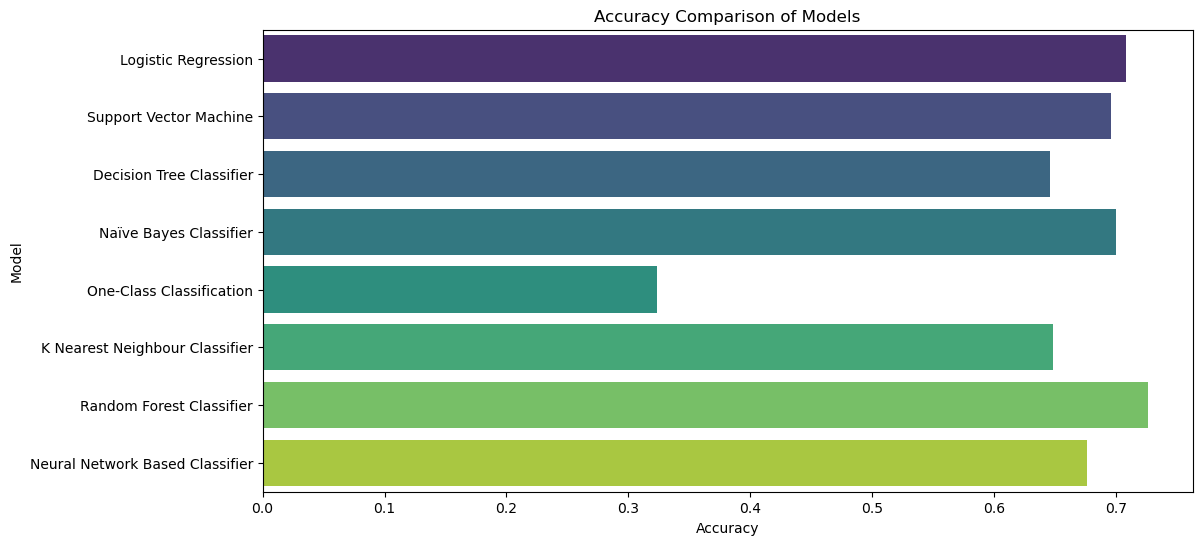

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")
plt.title("Accuracy Comparison of Models")
plt.show()

<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

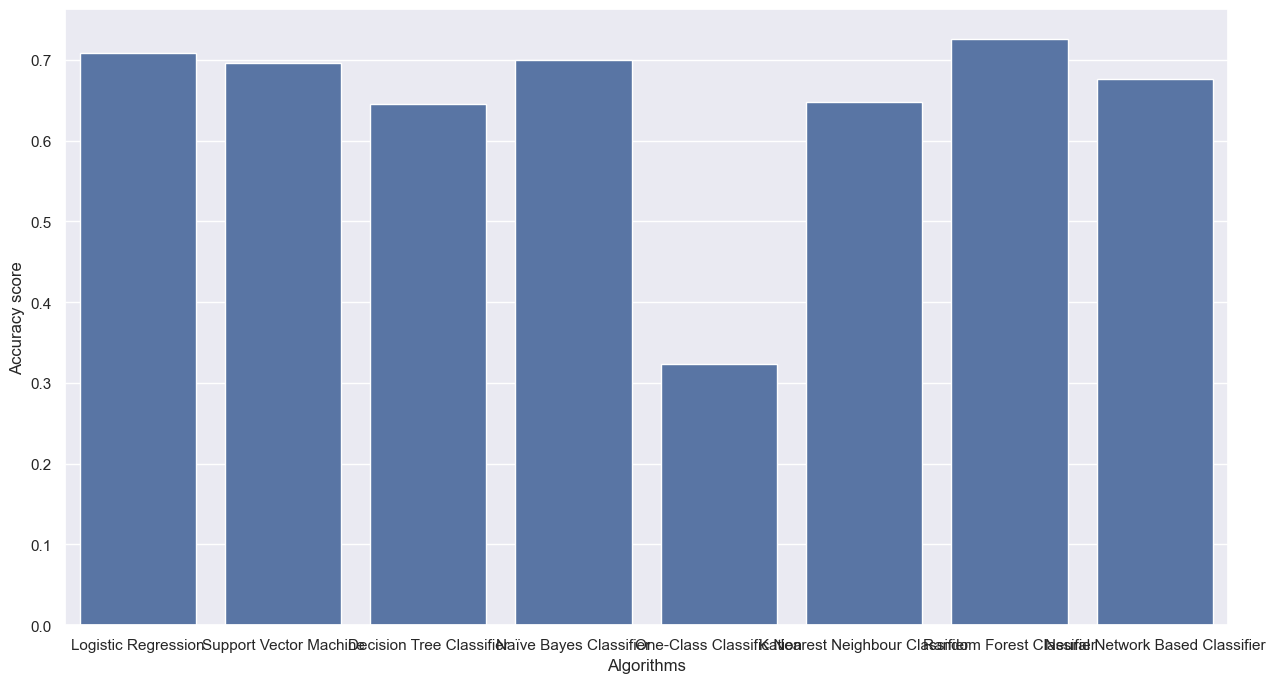

In [25]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=results_df['Model'], y=results_df['Accuracy'])

In [26]:
results_df.to_csv("model_comparison_min.csv", index=False)

In [27]:
# Save the model using joblib
import joblib
joblib.dump(RandomForestClassifier, "model_joblib_heart.pkl")
print("Model saved as 'model_joblib_heart.pkl'")

Model saved as 'model_joblib_heart.pkl'


In [28]:
import joblib
from tkinter import *
from tkinter import messagebox

def show_entry_fields():
    try:
        # Retrieve inputs and convert them to the appropriate data types
        p1 = int(e1.get())  # Age
        p2 = int(e2.get())  # Male or Female [1/0]
        p3 = int(e3.get())  # Chest pain type (cp)
        p4 = int(e4.get())  # Resting blood pressure (trestbps)
        p5 = int(e5.get())  # Serum cholesterol (chol)
        p6 = int(e6.get())  # Fasting blood sugar (fbs)
        p7 = int(e7.get())  # Resting electrocardiographic results (restecg)
        p8 = int(e8.get())  # Maximum heart rate achieved (thalach)
        p9 = int(e9.get())  # Exercise induced angina (exang)
        p10 = float(e10.get())  # Depression induced by exercise (oldpeak)
        p11 = int(e11.get())  # Slope of peak exercise ST segment (slope)
        p12 = int(e12.get())  # Number of major vessels colored by fluoroscopy (ca)
        p13 = int(e13.get())  # Thalassemia (thal)
        
        # Construct the input feature list
        input_features = [p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13]
        
        # Adjust for one-hot encoded features if needed (you might need to adjust this based on your model's feature set)
        complete_features = input_features + [0] * (22 - len(input_features))  # Fill to 22 features
        
        # Load the trained model
        model = joblib.load('model_joblib_heart')
        
        # Make a prediction
        result = model.predict([complete_features])  # Ensure complete_features is wrapped in a list
        
        # Display the result
        if result[0] == 0:
            messagebox.showinfo("Prediction Result", "No Heart Disease Detected.")
        else:
            messagebox.showinfo("Prediction Result", "Possibility of Heart Disease Detected.")
    
    except ValueError:
        # Handle invalid inputs
        messagebox.showerror("Input Error", "Please enter valid numeric values in all fields.")
    except Exception as e:
        # Handle other exceptions
        messagebox.showerror("Error", f"An error occurred: {e}")

# Set up the main GUI window
master = Tk()
master.title("Heart Disease Prediction System")

# Create and place labels and entry fields
Label(master, text="Heart Disease Prediction System", bg="black", fg="white", font=("Arial", 16)).grid(row=0, columnspan=2, pady=10)
labels = [
    "Enter Your Age", "Male Or Female [1/0]", "Enter Value of CP", "Enter Value of trestbps",
    "Enter Value of chol", "Enter Value of fbs", "Enter Value of restecg", "Enter Value of thalach",
    "Enter Value of exang", "Enter Value of oldpeak", "Enter Value of slope", "Enter Value of ca", "Enter Value of thal"
]
entries = []

# Add labels and entry fields dynamically
for i, text in enumerate(labels, start=1):
    Label(master, text=text, font=("Arial", 12)).grid(row=i, column=0, padx=10, pady=5, sticky=E)
    entry = Entry(master, font=("Arial", 12))
    entry.grid(row=i, column=1, padx=10, pady=5)
    entries.append(entry)

# Unpack entry fields
e1, e2, e3, e4, e5, e6, e7, e8, e9, e10, e11, e12, e13 = entries

# Add a prediction button
Button(master, text='Predict', command=show_entry_fields, font=("Arial", 12), bg="blue", fg="white").grid(row=30, columnspan=2, pady=10)

# Run the GUI loop
master.mainloop()
